# Bộ dữ liệu lịch sử Việt Nam (vietnamese_history_dataset)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset

In [3]:
data_path = "../../datasets/vietnamese_history_dataset/data.json"
df = pd.read_json(path_or_buf=data_path)
df.head()

,title,content,type
0,BUỔI ĐẦU LỊCH SỬ NƯỚC TA,Chương: BUỔI ĐẦU LỊCH SỬ NƯỚC TA,chapter
1,THỜI NGUYÊN THUỶ TRÊN ĐẤT NƯỚC TA,Chương: BUỔI ĐẦU LỊCH SỬ NƯỚC TA\nBài: THỜI NG...,lesson
2,Những dấu tích của Người tối cổ được tìm thấy ...,Bài: THỜI NGUYÊN THUỶ TRÊN ĐẤT NƯỚC TA\nNhững ...,title
3,"Ở giai đoạn đầu, Người tinh khôn sống như thế ...",Bài: THỜI NGUYÊN THUỶ TRÊN ĐẤT NƯỚC TA\nỞ giai...,title
4,Giai đoạn phát triển của Người tinh khôn có gì...,Bài: THỜI NGUYÊN THUỶ TRÊN ĐẤT NƯỚC TA\nGiai đ...,title


# Thống kê số lượng mẫu mỗi loại

In [4]:
df.shape

(1121, 3)

In [5]:
num_of_each_type = df.groupby("type").size()
num_of_each_type

type
chapter     67
lesson     199
title      855
dtype: int64

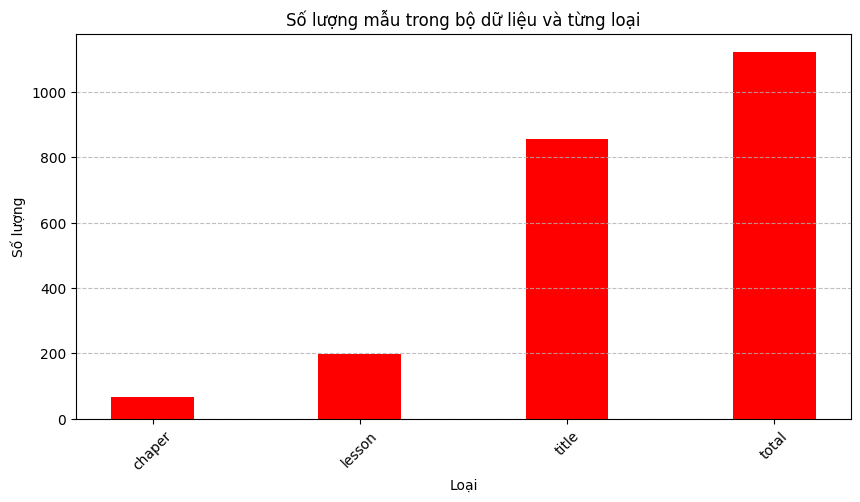

In [6]:
labels = ["chaper", "lesson", "title", "total"]

values = [x for x in num_of_each_type]
values.append(len(df))

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='red', width=0.4)
plt.title("Số lượng mẫu trong bộ dữ liệu và từng loại")
plt.xlabel("Loại")
plt.ylabel("Số lượng")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
# plt.savefig("num_of_each_type.png")
plt.show()

# Biểu đồ Histogram phân bố độ dài nội theo theo loại

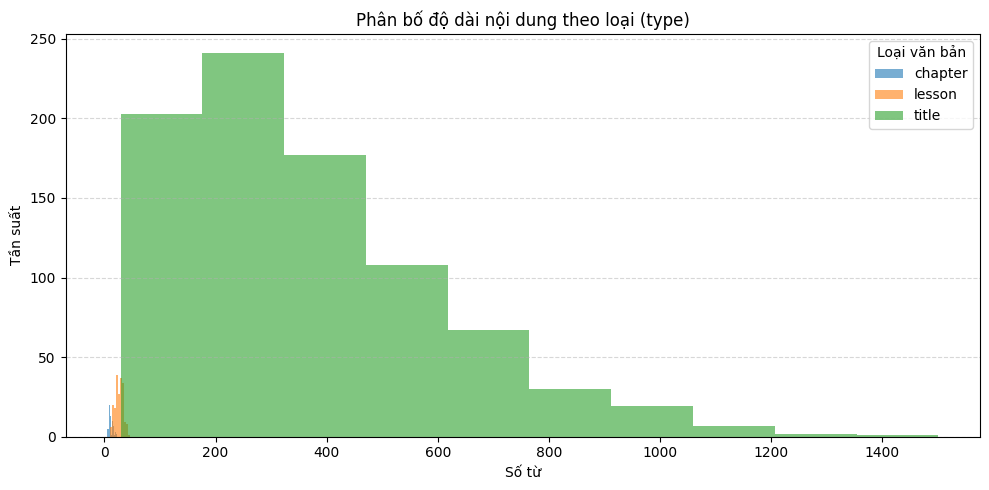

In [7]:
import matplotlib.pyplot as plt

# Tính độ dài nội dung
df["word_count"] = df["content"].apply(lambda x: len(x.split()))

# Vẽ histogram
plt.figure(figsize=(10, 5))

for t in df["type"].unique():
    subset = df[df["type"] == t]
    plt.hist(subset["word_count"], bins=10, alpha=0.6, label=t)

plt.title("Phân bố độ dài nội dung theo loại (type)")
plt.xlabel("Số từ")
plt.ylabel("Tần suất")
plt.legend(title="Loại văn bản")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Thống kê số lượng token cho mỗi dòng content

In [8]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(
    "trituenhantaoio/bert-base-vietnamese-uncased",
    cache_dir="../../tokenizer_models/"
)

In [9]:
df["token_count"] = df["content"].apply(lambda x: len(tokenizer.encode(x)))

# Hiển thị 5 dòng đầu tiên để kiểm tra
print(df[["type", "content", "token_count"]].head())

      type                                            content  token_count
0  chapter                   Chương: BUỔI ĐẦU LỊCH SỬ NƯỚC TA           13
1   lesson  Chương: BUỔI ĐẦU LỊCH SỬ NƯỚC TA\nBài: THỜI NG...           25
2    title  Bài: THỜI NGUYÊN THUỶ TRÊN ĐẤT NƯỚC TA\nNhững ...          244
3    title  Bài: THỜI NGUYÊN THUỶ TRÊN ĐẤT NƯỚC TA\nỞ giai...          210
4    title  Bài: THỜI NGUYÊN THUỶ TRÊN ĐẤT NƯỚC TA\nGiai đ...          227


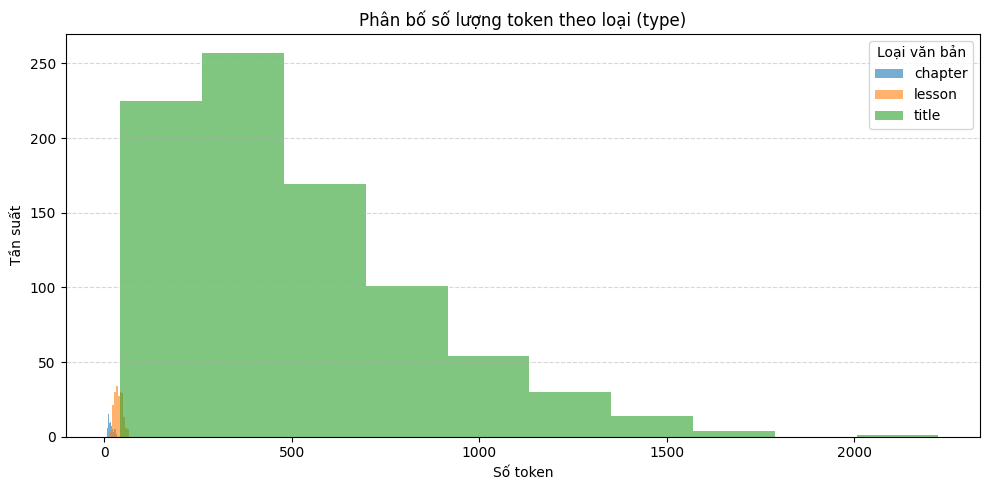

In [10]:
# Biểu đồ thống kê số lượng token
plt.figure(figsize=(10, 5))
for t in df["type"].unique():
    subset = df[df["type"] == t]
    plt.hist(subset["token_count"], bins=10, alpha=0.6, label=t)
plt.title("Phân bố số lượng token theo loại (type)")
plt.xlabel("Số token")
plt.ylabel("Tần suất")
plt.legend(title="Loại văn bản")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [11]:
# Thống kê cơ bản
print(df["token_count"].describe())

# Hoặc thống kê theo từng loại
print(df.groupby("type")["token_count"].describe())


count    1121.000000
mean      390.206958
std       353.052955
min         8.000000
25%        73.000000
50%       323.000000
75%       577.000000
max      2225.000000
Name: token_count, dtype: float64
         count        mean         std   min    25%    50%    75%     max
type                                                                     
chapter   67.0   18.164179    6.711810   8.0   13.0   17.0   22.0    34.0
lesson   199.0   38.065327   10.664335  16.0   30.0   36.0   46.0    66.0
title    855.0  501.321637  333.654150  43.0  250.5  433.0  678.0  2225.0
